In [17]:
!pip install rpy2==3.4.1

     |████████████████████████████████| 194kB 5.1MB/s 
  Created wheel for rpy2: filename=rpy2-3.4.1-cp36-cp36m-linux_x86_64.whl size=280695 sha256=c4273515d559aea48836a1d2f5b96237fb2923f05229a7995840653fbf5160f3
  Stored in directory: /root/.cache/pip/wheels/d7/3e/7a/f33df64534c242e47ef062aeeecf39b10f73a403ae01088a9e
Successfully built rpy2
  Found existing installation: rpy2 3.2.7
    Uninstalling rpy2-3.2.7:
      Successfully uninstalled rpy2-3.2.7


In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("BiocManager")

In [ ]:
# prerequisites
!pip install scanpy

In [ ]:
%%R
BiocManager::install("splatter")

# Google Colab setups

In [5]:
# Note: GPU may not be needed for the given dataset/chosen model
import tensorflow as tf

if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


In [6]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
import os

path = 'drive/My Drive/Denoising scRNA-seq - Framework/' #add path of project folder in your G-drive
os.chdir(path)

In [8]:
!ls # check if in correct dir

data		   generate_data.ipynb	model		    __pycache__  utils
experiments.ipynb  img			original_dca.ipynb  Readme.md


# Upload data

In [10]:
%load_ext autoreload

In [15]:
%autoreload 2
from utils import data_utils
from utils import plot_utils

raw, true = data_utils.get_simdata()

In [16]:
raw_norm = plot_utils.normalize_for_plot(raw)
true_norm = plot_utils.normalize_for_plot(true)

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


... storing 'Batch' as categorical


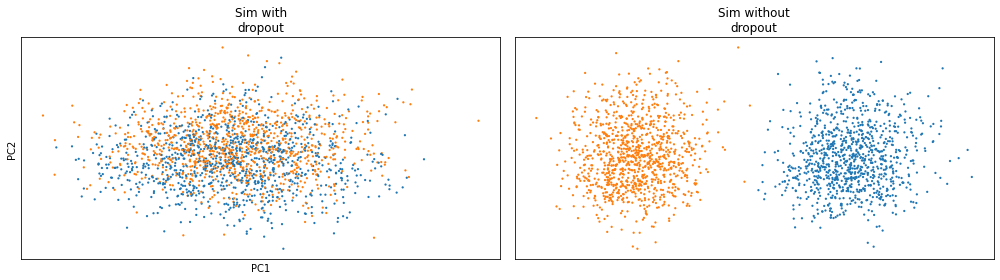

In [17]:
# visualize data
adatas = [raw_norm, true_norm]
adata_labels = ["Sim with\ndropout", "Sim without\ndropout"]

plot_utils.plot(adatas, adata_labels)

# Run model

In [19]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [18]:
%autoreload 2
from model import api 

denoised = api.denoise(raw)

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


dca: Successfully preprocessed 195 genes and 2000 cells.


TypeError: ignored

In [ ]:
import pickle 

with open('data/denoised_raw_2.pickle', 'wb') as handle:
    pickle.dump(denoised, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Plot results

In [ ]:
denoised_norm = plot_utils.normalize_for_plot(denoised)

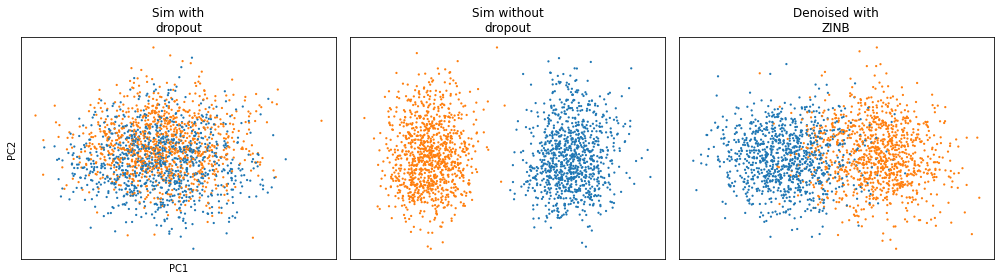

In [ ]:
# visualize data
adatas = [raw_norm, true_norm, denoised_norm]
adata_labels = ["Sim with\ndropout", "Sim without\ndropout", "Denoised with\nZINB"]

plot_utils.plot(adatas, adata_labels)

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'Batch' as categorical


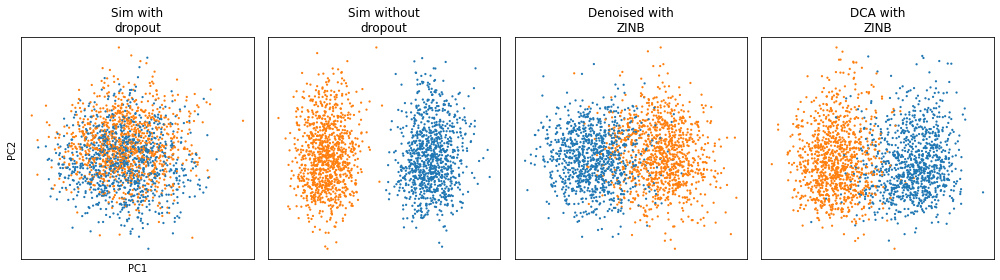

In [ ]:
%autoreload 2
from utils import plot_utils

kwargs = {"sim_raw_2":"Sim with\ndropout", "sim_true_2":"Sim without\ndropout", "denoised_raw_2":"Denoised with\nZINB", "dca_raw_2":"DCA with\nZINB"}

plot_utils.plot_compare_dca(save=True, **kwargs)